In [3]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import scipy.stats as sct

In [10]:
inputpath = r'C:\Users\kenta.c.suzuki\Documents\Local_modeling_practice\midoribon\Chap2\chap2_data.csv'
df = pd.read_csv(inputpath)
data = pd.Series(df.get('x'))
data.head()

0    2
1    2
2    4
3    6
4    4
Name: x, dtype: int64

In [11]:
len(data)

50

In [12]:
data.describe()

count    50.00000
mean      3.56000
std       1.72804
min       0.00000
25%       2.00000
50%       3.00000
75%       4.75000
max       7.00000
Name: x, dtype: float64

(array([ 1.,  3., 11., 12., 10.,  5.,  4.,  4.]),
 array([-0.5,  0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5]),
 <a list of 8 Patch objects>)

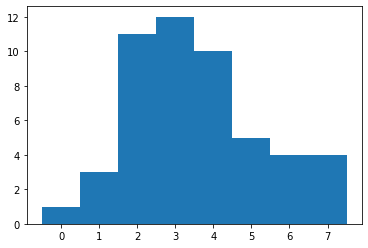

In [28]:
fig = plt.figure()
ax1 = fig.add_subplot()
ax1.hist(data, bins = np.arange(-0.5, 8.5, 1))

In [14]:
#標本分散
data.var(ddof=0)

2.9264000000000006

In [24]:
#不偏分散
data.var(ddof=1)

2.986122448979592

In [25]:
#標本分散
np.var(data)

2.9264000000000006

In [29]:
#不偏分散
np.var(data,ddof=1)

2.986122448979592

In [32]:
#標準偏差その1
data.std()

1.728040060004279

In [33]:
#標準偏差その2
np.sqrt(data.var())

1.728040060004279

In [25]:
y = range(10)
prob = sct.poisson.pmf(y, mu=3.56)

In [26]:
prob

array([0.02843882, 0.10124222, 0.18021114, 0.21385056, 0.190327  ,
       0.13551282, 0.08040427, 0.04089132, 0.01819664, 0.00719778])

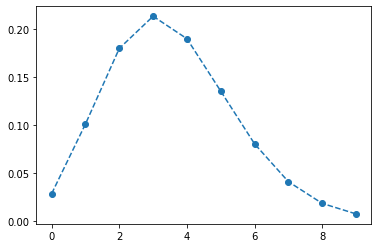

In [35]:
plt.plot(y, prob, "o--")

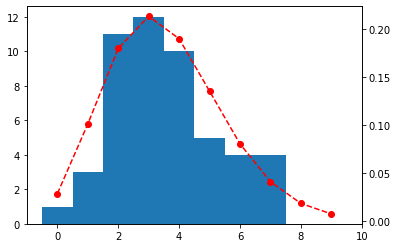

In [37]:
fig, ax1 = plt.subplots()
ax1.hist(data, bins = [i-0.5 for i in range(11)])
ax2 = ax1.twinx()
ax2.plot(y, prob, "ro--")

plt.show()

In [54]:
norm = sct.norm.rvs(loc = 50, scale = 20, size = 1000)

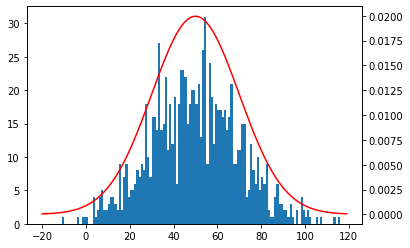

In [61]:
#グラフ作成の練習
fig_sample = plt.figure()
ax_sample = fig_sample.add_subplot()
ax_sample.hist(norm,bins=range(-20,120))
ax_sample2 = ax_sample.twinx()
ax_sample2.plot(range(-20, 120), sct.norm.pdf(x=range(-20,120), loc = 50, scale = 20),color='r')

plt.show()

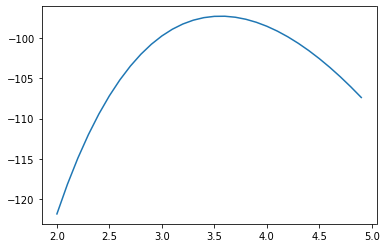

In [62]:
#尤度L(θ) = すべてのiに対してp(y_i|θ)の積だから、対数を取ってlogLの関数作成(θ = 確率分布の平均)
logL = lambda m: sum(sct.poisson.logpmf(data,m)) #func = lambda 引数: return ⇒ func(引数) = return
x = np.arange(2,5,0.1)
logL_list = [logL(m) for m in x] #for 変数 in リスト
plt.plot(x, logL_list)

(array([ 1.,  9., 10., 10.,  7.,  5.,  4.,  2.,  2.,  0.]),
 array([-0.5,  0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5]),
 <a list of 10 Patch objects>)

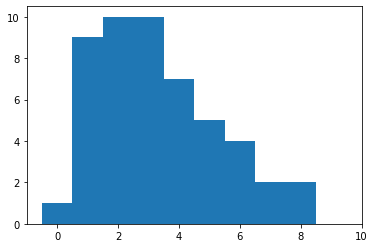

In [76]:
poidata = sct.poisson.rvs(mu = 3.5, size = 50)
plt.hist(poidata, bins = np.arange(-0.5, 10.5, 1))

In [77]:
poidata.mean()#平均3.5とのずれが発生

3.32

In [78]:
#確率変数50個の平均(最尤推定量)を3000回取得し、その分布を図示
count = list()
for _ in range(3000):
    d = sct.poisson.rvs(mu = 3.5, size = 50)
    count.append(d.mean())

(0, 150)

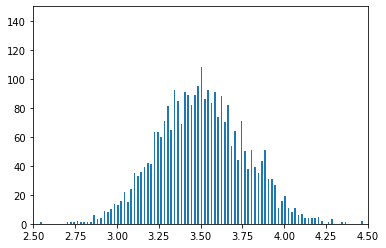

In [81]:
plt.hist(count, bins = np.arange(2.5, 4.5, 0.01))
plt.xlim(2.5, 4.5)
plt.ylim(0, 150)

(0, 200)

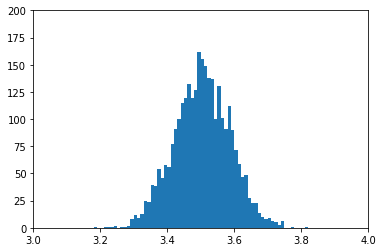

In [6]:
#確率変数を500個に増やして、同様に3000回分の最尤推定量の分布を取得
count = list()
for _ in range(3000):
    d = sct.poisson.rvs(mu = 3.5, size = 500)
    count.append(d.mean())
    
plt.hist(count, bins = np.arange(3.0, 4.0, 0.01))
plt.xlim(3.0, 4.0)
plt.ylim(0,200)